*Supporting textbook chapters: 5.4-5.9*

## Gaussian quadrature

### General Idea

$\int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k)$ , with $w_k$ "weights" and $x_k$ "sample points"

Newton-Cotes:
* have to use $N$ equally-spaced sampled points.
* $N^{\text{th}}$-order N-C exact for polynomial of degree $N$.
* A $N^{\text{th}}$-order polynomial approximates a well-behaved function better than a $(N-1)^{\text{th}}$-order polynomial, because of the added degree of freedom.

Gaussian quadrature:
* $N$ **unequally-spaced points** $\Rightarrow$ $N$ more degrees of freedom,
* exact for $(2N-1)^{th}$-order polynomial.
* other way to look at it: it will give the same level of accuracy as an approximation by a $(2N-1)^{th}$-order polynomial.

Remarkably, there is a universal rule to choose the $w_k$ and $x_k$:
* $x_k = $ roots of $N^\text{th}$ Legendre polynomial $P_N(x)$.
* $\displaystyle w_k = \left[\frac{2}{1-x^2}\left(\frac{dP_N}{dx}\right)^{-2}\right]_{x={x_k}}$, while $P_N(x_k)=0$.

Pros:
* complicated error formula, but in general: approximation error improves by a factor $c/N^2$ when you increase # of sample points by 1
* e.g., going from $N=10$ to $N=11$ sample points improves your estimate by a factor of $\sim 100$ $\Rightarrow$ converge very quickly to true value of the integral.

Cons:
* only works well if function is reasonably smooth (since sample points are farther apart),
* really hard to get an accurate estimate of the error, if needed.

### About Legendre Polynomials

* Defined to be mutually orthonormal:
    $$\forall (M, N) \in\mathbb N^2, \quad \int_{-1}^1 P_N(x)P_M(x) dx = \frac{2\delta_{MN}}{2N+1}.$$
* Defined recursively:
    $$P_0(x) = 1 \Rightarrow P_1(x) = x \Rightarrow P_2(x) = \dots,\ \text{or}$$
    $$(N+1)P_{N+1}(x) = (2N+1)xP_N(x) -NP_{N-1}(x),\ \text{or}$$
    $$\frac{d}{dx}\left[(1-x^2)\frac{d P_{N+1}}{dx}(x)\right] = -N(N+1)P_N(x),\ \text{or}$$
    $$P_N(x) = \frac1{2^N N!}\frac{d^N}{dx^N}\left[(x^2-1)^N\right]\dots$$

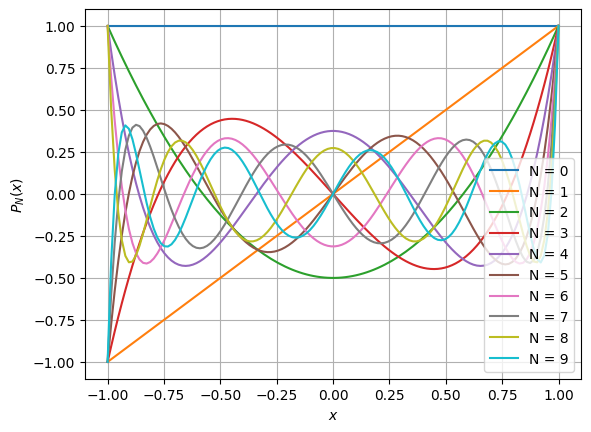

In [2]:
from scipy.special import legendre
from matplotlib.pyplot import plot, grid, xlabel, ylabel, figure, legend
from numpy import linspace

x = linspace(-1, 1, 128)
figure(dpi=100)
for N in range(10):
    plot(x, legendre(N)(x), label='N = {}'.format(N))
grid()
xlabel("$x$")
ylabel("$P_N(x)$")
legend()

### Finding the weights and points

$\int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k)$ , with $w_k$ "weights" and $x_k$ "sample points"

* It's beautiful that there is a universal rule for choosing the $w_k$ and $x_k$; in the context of this course, we'll just accept that it works rather than doing the derivation (Appendix C of textbook if you're curious)
* Old-fashioned tables exist. Textbook mentions Abramowitz and Stegun; was replaced long ago by NIST's Digital Library for Mathematical Functions. 
    For Gauss quadrature: https://dlmf.nist.gov/3.5#v
* Don’t even write your own program to find sample points and weights -- use given subroutines. 
    * `gaussxw.py` for integration limits from $-1$ to $+1$,
    * `gaussxwab.py` for integration limits from $a$ to $b$.
* The calculation of weights and points is expensive. Use `gaussxw.py` if you are going to change the limits repeatedly (and see end of §5.6.1, pp. 167-168, for how to do).